In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

# Referencyjne parametry (z oryginalnego problemu, niekoniecznie pasujące do poniższych danych)
a_true = 0.2
b_true = 0.8

# Metraż (m2)
X = np.array([25, 30, 45, 50, 65, 80, 95, 110]).reshape(-1, 1)
# Cena (tys. PLN)
y = np.array([180, 210, 310, 350, 430, 520, 610, 700])

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Kształt danych treningowych X: {X_train.shape}, y: {y_train.shape}")
print(f"Kształt danych testowych X: {X_test.shape}, y: {y_test.shape}")

Kształt danych treningowych X: (6, 1), y: (6,)
Kształt danych testowych X: (2, 1), y: (2,)


In [10]:
# Najprostsza możliwa sieć - jeden neuron bez aktywacji
# To jest dokładnie regresja liniowa: y = Wx + b
model_simple = keras.Sequential([
    layers.Dense(1, input_shape=(1,))  # 1 neuron, 1 wejście
])

# Wyświetl architekturę
model_simple.summary()

# Kompilacja - wybieramy optymalizator i funkcję straty
model_simple.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001),  # Stochastic Gradient Descent, zmniejszono learning_rate
    loss='mse'  # Mean Squared Error - suma kwadratów błędów
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("\nTrenowanie modelu...")

# Historia treningu - zapisujemy błąd w każdej epoce
history_simple = model_simple.fit(
    X_train, y_train,
    epochs=200,           # Liczba przejść przez cały zbiór danych
    batch_size=32,        # Ile próbek na raz
    validation_data=(X_test, y_test),  # Dane do walidacji
    verbose=0             # Nie wyświetlaj postępu
)

print("Trenowanie zakończone!")


Trenowanie modelu...
Trenowanie zakończone!


In [15]:
area_to_predict = np.array([[70]])
predicted_price = model_simple.predict(area_to_predict)[0][0]

print(f"Przewidywana cena mieszkania o metrażu 70 m2: {predicted_price:.2f} tys. PLN")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Przewidywana cena mieszkania o metrażu 70 m2: 456.45 tys. PLN


Model ma 2 parametry

In [16]:
# Pobierz nauczone wagi (weights) i bias
weights = model_simple.get_weights()
a_learned = weights[0][0][0]
b_learned = weights[1][0]

print(f"Nauczona waga (weight/a): {a_learned:.4f}")
print(f"Nauczony bias (obciążenie/b): {b_learned:.4f}")

Nauczona waga (weight/a): 6.5108
Nauczony bias (obciążenie/b): 0.6918


Waga odpowiada za kąt prostej decyzyjnej, a bias o przesunięcie

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


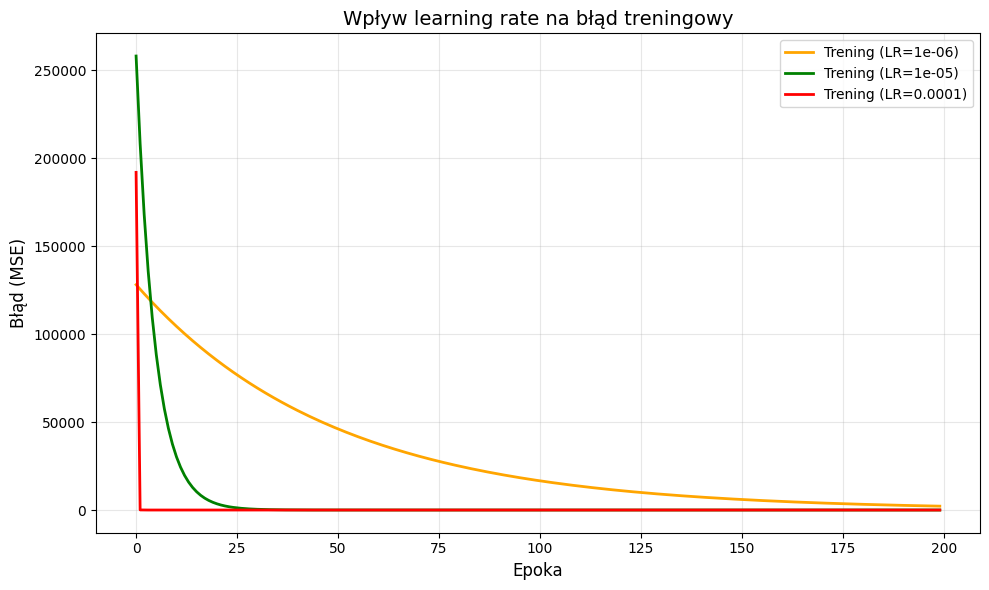

In [20]:
learning_rates = [0.000001, 0.00001, 0.0001]
colors = ['orange', 'green', 'red']
histories = []

fig3, ax3 = plt.subplots(1, 1, figsize=(10, 6)) # Zmieniono na jeden subplot

for idx, (lr, color) in enumerate(zip(learning_rates, colors)):
    # Nowy model dla każdego lr
    model = keras.Sequential([
        layers.Dense(1, input_shape=(1,))
    ])

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=lr),
        loss='mse'
    )

    history = model.fit(
        X_train, y_train,
        epochs=200,
        batch_size=32,
        validation_data=(X_test, y_test),
        verbose=0
    )

    histories.append(history)

    # Wykres - wszystkie linie na jednym axes3
    ax3.plot(history.history['loss'], color=color, linewidth=2, label=f'Trening (LR={lr})')
    # Usunięto plotowanie val_loss, aby spełnić "3 linie na jednym wykresie"
    # ax3.plot(history.history['val_loss'], color=color, linewidth=2,
    #                linestyle='--', alpha=0.7, label=f'Walidacja (LR={lr})') # Opcjonalnie, jeśli chcesz też walidację

ax3.set_xlabel('Epoka', fontsize=12)
ax3.set_ylabel('Błąd (MSE)', fontsize=12)
ax3.set_title('Wpływ learning rate na błąd treningowy', fontsize=14) # Jeden tytuł dla całego wykresu
ax3.legend() # Jedna legenda dla wszystkich linii
ax3.grid(True, alpha=0.3)

# Usunięto set_ylim i text z końcowym błędem, ponieważ dotyczyły one pojedynczych subplotów

plt.tight_layout()
plt.show() # Dodano plt.show() do wyświetlenia wykresu

Gdy learning rate jest za mały, model uczy się powoli, wymaga większej ilości epok. Najlepszy model na learning rate 0.0001.